A clear and concise overview of how to load CAO points information from the
CAO website into a pandas data frame pitched at your classmates.


A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.


Appropriate plots and other visualisations to enhance your notebook for viewers

# CAO Project
***
<br> 
This project aims to provide a clear and consise overview of how to load CAO points information from 2019-2021 into usable pandas dataframes. It will also provide a detailed comparison of the points from 2021, 2020, and 2019 using pandas, and use appropriate plots and visualisations to aid in the understanding of the data. 
<br>

### CAO
***
The CAO(Central Admissions Office) was established in 1976 and is responsible for over-seeing the admission of undergraduate applicants to colleges and universities in Ireland. Its aim is to process applications in a fair and efficient manner. While universities delegate the administration of admissions to the CAO, they still retain full control of their admissions. 
<br>
Students applying for admission to 3rd level courses, apply to the CAO rather than to the individual institutions. The CAO then offers places to students who meet the minimum requirements for the course. If a course has more applicants than places available, the CAO makes offers to the highest scoring applicants. If the student does not accept the offer, the CAO makes further offers (round 2, etc), until all the places on the course has been filled, or the offers close. 



#### The points system
***
- Higher Level
    
|Percentage|Grade|Points|
|:------:|:-----:|:------:|
| 90+|H1 |100 |
|80 - 89|H2|88|
|70 - 79|H3|77|
|60 - 69|H4|66|
|50 - 59|H5|56|
|40 - 49|H6|46|
|30 - 39|H7|37|
|>29|H8|0|


- Ordinary Level

|Percentage|Grade|Points|
|:------:|:-----:|:------:|
|90+|O1|56|
|80 - 89|O2|46|
|70 - 79|O3|37|
|60 - 69|O4|28|
|50 - 59|O5|20|
|40 - 49|O6|12|
|30 - 39|O7|0|
|>29|O8|0|



The CAO awards points to students based on their achievements in the Leaving Certificate examination. A student's points are calculated according to these tables, counting their best six subjects only (resulting in a maximum score of 625 points since 2012 with the introduction of the extra 25 points awarded to those who sit the honours mathematics exam and pass)[2]. If a student has sat the Leaving Certificate examination on more than one occasion, their points are calculated according to their best year's performance.

[1]: https://en.wikipedia.org/wiki/Central_Applications_Office
[2]: http://www2.cao.ie/handbook/handbook2022/hb.pdf



## pandas

***
pandas is a library written for use with Python, designed to aid in data manipulation and analysis. It began development in 2008, with creator Wes McKinney realising during his time at a capital management company that there was a need for high-performance, flexible tool to perform quantative analysis on financial data. He discovered python on a colleague's recommendation, and realised that while it was far more suited to data analysis than the likes of Excel or R, it was missing some key features such as CSV compatibility, an intuitive way of dealing with spreadsheet-like datasets with rows and columns, or a simple way to create a new column based on existing columns.[2] 
<br>
Thus pandas was born. 
<br>
In 2009, McKinney released the library as open source, and dropped out of grad school to focus on improving the library and adding new features. By 2012, it became clear that pandas was taking off, helping python become one of the primary data science languages. [2]


He has spent subsequent years adding features, and improving the code that forms the basis of the library. McKinney's work enables people to analyse and work with data who are not expert computer scientists. He has made the code intuitive and accessible, so that tasks that would have taken 50 complex lines of code in the past, now only takes 5 simple lines, because he has already done the heavy lifting. 


Today, pandas is used by millions of people around the world on a daily basis with many major companies that analyse data, such as Facebook, Google and JP Morgan also using the library.[1]


pandas offers data structures and operations for manipulating numerical tables and time series. It allows data to be imported from various file formats such as CSV, JSON, SQL, and Microsoft Excel. Pandas also allows various data manipulation operations such as merging, reshaping, selecting, as well as data cleaning, and data wrangling features, making it indispensible in data science.



[1]:https://en.wikipedia.org/wiki/Pandas_(software)

[2]: https://qz.com/1126615/the-story-of-the-most-important-tool-in-data-science/

### Importing the requisite modules for analysis
***

In [1]:
import re 

import requests as rq 

import datetime as dt

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import urllib.request as urlreq

import numpy as np


pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.rcParams["figure.figsize"] = (16, 10)
plt.style.use("ggplot")

## Saving original datasets 

For transparancy, it is good practice to save the original datasets each time that the data is run. This is useful for a number of reasons, most importantly to ensure that if the data on the website changes, that the dataset updates too. It is important to ensure that the previous versions are not overwritten, so to avoid this, the file path can be set using ```datetime```. The datetime module supplies classes for manipulating dates and times, and ```now``` returns the current local date and time. ```strftime``` ```%Y%m%d_%H%M%S``` returns now as a string in the following format - *Year, Month, Day_ Hour, Minute, Second* [1].

Once the format for the naming of the dataset is set, the file path can then be created allowing the file to be saved everytime the notebook is run. Note that at this point there has been nothing saved, this merely sets up the file name and path required. 

[1]: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
timestamp = now.strftime('%Y%m%d_%H%M%S')

## CAO Points 2021

***
This is the link for the cao website, and more specifically the 2021 points for the level 8 courses.
<br>
http://www.cao.ie/index.php?page=points&p=2021

The ```requests``` module allows a user to send HTTP/1.1 requests extremely easily. By using the code below a response object called ```resp``` can be gotten from the CAO website. This will be able to provide all the information needed from this object.[1] 
<br>
The response can then be checked be make sure it's successful using resp. HTTP response status code 200 lets the user know that request has succeeded. [2]

[1]: https://docs.python-requests.org/en/latest/user/quickstart/

[2]: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/200

In [3]:
# Getting the level 8 CAO points. Resp 200 means all okay 
resp = rq.get ("http://www2.cao.ie/points/l8.php")
resp

<Response [200]>

### Creating file path
***
The file path for the html response is then set. The .html file is saved in the folder created for the datasets and uses the timestamp created above to save the file. 

In [4]:
# Create a file path for the original data.
htmlpath_2021 = 'data/cao2021_' + timestamp + '.html'

### Error on server
***
When the data was run as per the server details it specifies that charset is iso-8858-1\*. This information can be obtained on Google Chrome by right-clicking on the webpage in question, selecting *inspect*, then selecting memory and reloading the page. The first item after reloading the page is selected and following that, the header section. Within that there is an option under *response headers* and this contains the contents. It states that the content type is as follows:

    *Content-Type: text/html; charset=iso-8859-1*
    
See picture below:

![](https://raw.githubusercontent.com/kaob1991/fundamentals-assessment/main/images/Screenshot%202021-11-05%2016.44.07.png)

This is an older encoding that is also known as *latin alphabet no. 1* and is often used on older websites. As of October 2021, 1.2% of all (but only 5 of the top 1000) websites use ISO 8859-1, with most today preferring to use UTF-8 [2]. 
<br>
However, while technically, the server states decoding should be done as per: *charset=iso-8859-1*, there is one line which uses \x96. This character isn't defined in iso-8859-1.[1] 
<br>
Therefore, a similar decoding standard *CP1252* should be used, which is very similar but includes #x96. CP1252 or Windows-1252 as its sometimes called, is a relatively uncommon encoding standard. Approximately 0.3% of all websites declared use of Windows-1252 as of October 2021 [3].

Fortunately, the fix is relatively straightforward with the ```original_encoding``` being changed to ```"cp1252"```

[1]: https://en.wikipedia.org/wiki/ISO/IEC_8859-1

[2]: https://w3techs.com/technologies/cross/character_encoding/ranking

[3]: https://w3techs.com/technologies/history_overview/character_encoding

In [5]:
# The server uses the wrong encoding
original_encoding = resp.encoding

# Change the encoding to cp1252.
resp.encoding = 'cp1252'

### Write to filepath

using ```open``` the text from the html response is written to a new file using the path that was specified above. 

In [6]:
with open(htmlpath_2021, 'w') as f:
    f.write(resp.text)

## Cleaning the data 
***

There are a number of ways that could be used to clean up the following data from the html that was returned from the CAO website, including manually removing the preamble, and institute names. However, Regular expressions are a very powerful tool in python that can be used to match the rows that are needed from the data. In this instance we are looking for the courses only, which follow a set pattern all through the the HTML file. They appear in the following format: 
<br>
   - *CW548  Mechanical Engineering                               330      328*
    <br>
   - *CW558  Electronic Systems                                   280*
    <br>
    
with each line denoting a different course. Note that the sequence of characters are the same for each course, i.e. 2 letters, followed immediately by 3 numbers, whitespace, the course title, further whitespace, and the points for round 1 (and round 2 if applicable).
<br>
Regular expressions allow complex searching and matching using a sequence of characters that specifies a search pattern. They can be used to "find", or "find and replace" and, as the data being returned that has the course information follows a set pattern, regular expressions or "regex's" can be used to remove the rows that aren't required. 

The regex required to do this is as follows: ```(r'([A-Z]{2}[0-9]{3})(.*)')```
 This is broken down as follows: 
 - ```(r'(``` denotes a raw string
 - ```[A-Z]{2}``` specifies we are looking for 2 Capital letters
 - ```[0-9]{3})``` followed immediately by 3 numbers
 - ```(.*)``` this specifies wildcard, ie an unknown number of unspecified characters


In [7]:
# Using regex's to match lines
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

## CSV File Creation
***
Once the lines are matched the code is then looped through to pull the required data and printed in a CSV-style format. 

Firstly we set the path that the ```csv``` file will write to. This is done using ```timestamp``` to timestamp it. 



In [8]:
csvpath_2021 = 'data/cao2021_csv_' + timestamp + '.csv'

Once this is set a ```for``` loop can be used to iterate through all the lines of code and only pull the information needed from it. 
<br>
Firstly a header needs to be created using ```f.write``` and we are using the following titles in that *Code*, *Title*, *Points R1*, *Points R2*. These will be joined using a ```,```
<br>
```dline = line.decode('cp1252')``` decodes each line using the decoding standard mentioned above. Following successful decoing, an ```if``` statement is used to begin to split the data and remove the unneccessary content from the html file. 
When the ```if``` statement is True the next line ```no_lines = no_lines + 1``` adds 1 to the tally that keeps count of how many courses are in the CSV file. 
The next step is to set the course code, the course title and the course points. The ```course_code``` is set from index 0 to index 4 which we can see is the first 5 characters
Then the course title is set, this is set from character 6 to 56, and ```strip``` removes any trailing whitespace[1].
Finally, the course points is set using ```split()``` on a single whitespace or more from character 59 to end of line. An ```if``` statement is there to state that if the number of sub-arrays in the course points variable is not equal to 2 then we are looking only for the first 2 entries.
In order to gather all this information into a coherent CSV compatible format, the final task is to gather each variable into a list called linesplit with the course code, course title and index 0 and 1 from the course points array, and then use```write``` with a *,* as a delimiter, then use ```.join``` to gather the whole file together






[1]: https://www.w3schools.com/python/ref_string_strip.asp

In [9]:
# This line keeps track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(csvpath_2021, 'w') as f:
    
    # Write a header row.
    f.write(','.join(['Code', 'Title', 'Points R1', 'Points R2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")


Total number of lines is 949.


The dataframe is called by using pandas inbuild csv reader and ensures the encoding is correctly set to read the file properly. 

In [10]:
df2021 = pd.read_csv(csvpath_2021, encoding='cp1252')

In [11]:
df2021

,Code,Title,Points R1,Points R2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


## 2020 Points
***
The 2020  points can be viewed on the following link on the CAO website. 
<br>
http://www.cao.ie/index.php?page=points&p=2020
***
Unlike the 2021 data the 2020 is only available via a excel (.xlsx) spreadsheet. This is helpful as pandas has an inbuilt excel file reader, which should reduce the amount of code required to create a useable CSV file. 

The fist step in creating a file is to specify the file path, which like the 2021 data will be done using the ```timestamp``` variable created previously . While it is unlikely that the 2020 dataset will change it is good practice to create a new original copy of the file from the CAO server each time the file is run. 


In [12]:
# Create a file path for the original data.
pathxlsx_2020 = 'data/cao2020_' + timestamp + '.xlsx'

In [13]:
urlreq.urlretrieve("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", pathxlsx_2020)


('data/cao2020_20211222_150844.xlsx',
 <http.client.HTTPMessage at 0x7b6a5a61f5e0>)

## Load spreadsheet using Pandas
***
pandas has a very quick and easy method of reading in ```xlsx``` files. It uses the ```read_excel``` function to retrieve the data from the CAO website and allows a number of variables to be set when doing this [1] 
When the original dataframe was read in, it was discovered that there was some preamble on the excel sheet that was preventing the dataset from being read properly. This can be seen below using the ```head()``` function which shows that for the first 10 rows of data there is only a guide to the dataset which isn't relevant in this instance.

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [14]:
df_2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx')
df_2020.head(12)


,ADMISSION DATA 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,End of Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Level 8, 7 & 6 with ISCED Broad Field Code",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The details given are for general information...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Random * = Not all on this points score were o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# = Test / Interview / Portfolio / Audition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AQA = All qualified applicants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,avp = Available Places,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,v = New competition for available places resul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8


To remove this data there is an inbuilt variable within the ```read_excel``` function that allows a specified number of rows to be skipped. In this instance the first 10 rows need to be skipped. The power of pandas is such that the function is able to detect a header row when looking at the first row of data which means that a user does not need to create one themselves. To clean up the dataset and maked it a little easier to view there were a number of empty rows created in error on the original spreadsheet, as well as some unrequired data such as the course level and the HEI offering the course that can be cleaned up immediately. This leaves us with 10 columns in the dataset. From glancing at the dataset it appears that *R1 points* and *EOS* are providing identical data but this can be investigated further below. 

In [15]:
# Download and parse the excel spreadsheet.
df_2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows=10)
drop_columns =["CATEGORY (i.e.ISCED description)","Column1", "v", "avp", "Column2","Column3","Column4","Column5","Column6","Column7","Column8", "HEI", "LEVEL"]
df_2020 = df_2020.drop(drop_columns,axis = 1)

In [16]:
df_2020

,COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,Test/Interview #
0,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,NaN
1,Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,NaN
2,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,#
3,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,#
4,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,#
...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,NaN
1460,Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,NaN
1461,Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,NaN
1462,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,NaN


### Spot Checking

It is good practice to spot check the data post- cleaning with the original dataset and it appears that, when comparing 2 samples with the .xlsx file the data is idential. It's important to do this to make sure that the data in each column is still a match with the original as this confirms that nothing odd has happened to any of the rows in the dataset. In this instance ```.iloc``` is used on row 250 and the last row of the dataset. Note that while starting top down is 0-indexed, checking from the bottom is 1-indexed, so -1 is the last row of the set. 

In [17]:
df_2020.iloc[250]

COURSE TITLE        Physiology and Health Science
COURSE CODE2                                CW106
R1 POINTS                                     451
R1 Random *                                   NaN
R2 POINTS                                     NaN
R2 Random*                                    NaN
EOS                                           451
EOS Random *                                  NaN
EOS Mid-point                                 509
Test/Interview #                              NaN
Name: 250, dtype: object

In [18]:
df_2020.iloc[-1]

COURSE TITLE        Mechanical and Manufacturing Engineering
COURSE CODE2                                           WD230
R1 POINTS                                                253
R1 Random *                                              NaN
R2 POINTS                                                NaN
R2 Random*                                               NaN
EOS                                                      253
EOS Random *                                             NaN
EOS Mid-point                                            369
Test/Interview #                                         NaN
Name: 1463, dtype: object

## Writing file to CSV

Now that the data is cleaned up it can be written to a CSV file ready for use. Again, the timestamp variable is used as well as the ```to_csv``` function. 

In [19]:
csv_path_2020 = 'data/cao2020_' + timestamp + '.csv'

In [20]:
df_2020.to_csv(csv_path_2020)


## 2019 Points

***
The 2019 points are available through the following link: 
https://www.cao.ie/index.php?page=points&p=2019
<br>
Unlike both the 2020 and 2021 data, the 2019 data is stored as a ```.pdf```. While there are some pdf extraction tools available online such as *Camelot*, extracting the file in this method also presents some issues. While extraction is a success it is unable to merge the tables from each page of the dataframe and saves the data as 18 ```.csv``` files. While it is helpful in many cases, in this it is still quicker to clean the data by hand. 

This requires a number of steps to be undertaken and these are listed below: 

- Download original pdf file.
- Open original pdf file in Microsoft Word.
- Save Microsoft Word's converted PDF in docx format.
- Re-save Word document for editing.
- Delete headers and footers.
- Delete preamble on page 1.
- Select all and copy.
- Paste into Visual Studio Code.
- Remove HEI name lines and black lines.
- Change column heading "COURSE AND INSTITUTION" to "Title".
- Change backticks to apostrophes.
- Replaced double tab character at on line 28 with single tab.
- Delete tabs at end of lines 107,171,335,373,425,433,700,701,752,793.

Following this the dataframe was ran but was still coming up with a completely empty column that was not visible on the CSV file, or the .docx file that the data was taken from. To solve this issue,the ```pandas.Dataframe.drop()``` function was used to manually remove the column in question. [1]


[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [21]:
df_2019 = pd.read_csv('data/cao2019_20211102_171530.csv', sep='\t')

df_2019=df_2019.drop("Unnamed: 4",axis = 1)




In [22]:
df_2019

,Code,Title,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328
1,AL802,Software Design with Cloud Computing,301,306
2,AL803,Software Design with Mobile Apps and Connected...,309,337
3,AL805,Network Management and Cloud Infrastructure,329,442
4,AL810,Quantity Surveying,307,349
...,...,...,...,...
925,WD200,Arts (options),221,296
926,WD210,Software Systems Development,271,329
927,WD211,Creative Computing,275,322
928,WD212,Recreation and Sport Management,274,311


This leaves us with a dataframe with 930 rows and 4 columns. Note that the 2019 dataframe does not have round 1 and round 2 points. This is in contrast to the 2 prior dataframes that have been cleaned. However, looking at the data from the 2020 dataset it can be seen that EOS and round 1 points are identical, so we can use the 2019 data to compare against the 2020 and '21 dataset for round 1. This will make accurately analysing the data from the 3 years less accurate than would be hoped but we should still hope to see some interesting relationships in the data

## Concatenating and joining the files
***

Now that the data is all in .csv files and the irrelevant data is cleared from the datasets, the next step is to merge the data into 1 coherent dataset. This will be done in a series of steps, firstly we want to take only the course name and title and remove any duplicates 

#### 2021 data

In [24]:
# Create a dataset with just the course and the title
courses2021 = df2021[['Code', 'Title']]
courses2021

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


#### 2020 data

In [25]:
# Create a dataset with the 2020 data, and set the titles to match the other datasets
courses2020 = df_2020[['COURSE CODE2','COURSE TITLE']]
courses2020.columns = ['Code', 'Title']
courses2020

,Code,Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


#### 2019 Data

In [26]:
# Create a dataset with the 2019 data containing just the code and the title
courses2019 = df_2019[['Code', 'Title']]
courses2019

,Code,Title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


***
Once the 3 datasets are prepared, the next step is to join them together. There is a function in ```pandas``` that can easily do that for us, as seen below:
<br>
<br>

In [27]:
#Join all the courses together, rebuilding the index 
allcourses = pd.concat([courses2021, courses2020,courses2019], ignore_index=True)
allcourses

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


## Removing Duplications
***
Once the courses are all in the same dataset, we need to remove duplicated courses from the dataset. This is courses that appear in more than one of the datasets.

In [28]:
#Sort courses by course code
allcourses.sort_values("Code")

,Code,Title
175,AC120,International Business
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
2412,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
3342,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


***
The below 3 lines demonstrate the appearance of the same course in 3 instances:

In [29]:
# Show the course at location 175
allcourses.iloc[175]

Code                      AC120
Title    International Business
Name: 175, dtype: object

In [30]:
# Show the course at location 949
allcourses.iloc[949]

Code                      AC120
Title    International Business
Name: 949, dtype: object

In [31]:
# Show the course at location 2581
allcourses.iloc[2581]

Code                      AC120
Title    International Business
Name: 2581, dtype: object

***
We then want to look at what courses are duplicated by title. After running the code there are 1405 rows of duplicates that need to be removed


In [32]:
allcourses[allcourses.duplicated()]

,Code,Title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [33]:
# This drops the duplicated courses
allcourses.drop_duplicates()

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3281,TL801,Animation Visual Effects and Motion Design
3282,TL802,"TV, Radio and New Media"
3283,TL803,Music Technology
3286,TL812,Computing with Digital Media


We then look at the courses that share the same course code and delete the duplicates. There are 1692 rows that are duplicated 

In [34]:
allcourses[allcourses.duplicated(subset=['Code'])]

,Code,Title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [35]:
# Drop code code duplicates
allcourses.drop_duplicates(subset=['Code'], inplace=True, ignore_index=True)

In [36]:
# Set index to code
allcourses.set_index('Code', inplace=True)

In [37]:
# This leaves us with just a single instance of each course 
allcourses

,Title
Code,
AL801,Software Design for Virtual Reality and Gaming
AL802,Software Design in Artificial Intelligence for...
AL803,Software Design for Mobile Apps and Connected ...
AL805,Computer Engineering for Network Infrastructure
AL810,Quantity Surveying
...,...
SG441,Environmental Science
SG446,Applied Archaeology
TL803,Music Technology


## Adding points

For each year we need to add the points to the master ```allcourses``` dataset

In [38]:
# Set index to code in the 2021 dataframe and add the points from round 1 and 2
df2021.set_index('Code', inplace=True)
df2021.columns = ['Title', 'points_r1_2021', 'points_r2_2021']
df2021

,Title,points_r1_2021,points_r2_2021
Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [39]:
# Add the points to the master allcourses
allcourses = allcourses.join(df2021[['points_r1_2021','points_r2_2021']])
allcourses

,Title,points_r1_2021,points_r2_2021
Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [40]:
# Renaming the columns and pulling the data from the 2020 dataframe
df2020 = df_2020[['COURSE CODE2', 'R1 POINTS','R2 POINTS']]
df2020.columns = ['Code', 'points_r1_2020', 'points_r2_2020']
df2020

,Code,points_r1_2020,points_r2_2020
0,AC120,209,NaN
1,AC137,252,NaN
2,AD101,#+matric,NaN
3,AD102,#+matric,NaN
4,AD103,#+matric,NaN
...,...,...,...
1459,WD208,188,NaN
1460,WD210,279,NaN
1461,WD211,271,NaN
1462,WD212,270,NaN


In [41]:
#Set the index to course code
df2020.set_index('Code', inplace=True)
df2020

,points_r1_2020,points_r2_2020
Code,,
AC120,209,NaN
AC137,252,NaN
AD101,#+matric,NaN
AD102,#+matric,NaN
AD103,#+matric,NaN
...,...,...
WD208,188,NaN
WD210,279,NaN
WD211,271,NaN


In [42]:
#Join the 2020 points to the master datafile
allcourses = allcourses.join(df2020)
allcourses

,Title,points_r1_2021,points_r2_2021,points_r1_2020,points_r2_2020
Code,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN,303,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN,332,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN,337,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN,333,NaN
AL810,Quantity Surveying,328,NaN,319,NaN
...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,NaN,NaN
TL803,Music Technology,NaN,NaN,NaN,NaN


In [43]:
# Adding course code, eos and mid to the dataset
df2019 = df_2019[['Code', 'EOS','Mid']]

df2019

,Code,EOS,Mid
0,AL801,304,328
1,AL802,301,306
2,AL803,309,337
3,AL805,329,442
4,AL810,307,349
...,...,...,...
925,WD200,221,296
926,WD210,271,329
927,WD211,275,322
928,WD212,274,311


In [44]:
#Setting the index to course code
df2019.set_index('Code', inplace=True)
df2019

,EOS,Mid
Code,,
AL801,304,328
AL802,301,306
AL803,309,337
AL805,329,442
AL810,307,349
...,...,...
WD200,221,296
WD210,271,329
WD211,275,322


In [45]:
# Joining the 2019 courses to the master dataset 
allcourses = allcourses.join(df2019)

In [46]:
allcourses.loc["AD102"]

Title             Graphic Design and Moving Image Design (portfo...
points_r1_2021                                                 #538
points_r2_2021                                                  NaN
points_r1_2020                                             #+matric
points_r2_2020                                                  NaN
EOS                                                          # +mat
Mid                                                             635
Name: AD102, dtype: object

### Removing special characters
***
At this stage, we have all the data we require in the dataset ready for analysis. However there are  some special characters that will make analysis more difficult. Take the example above for example which required a portfolio for entrance to the course. This presents some issues when analysing the data and thus the special characters need to be removed from the dataset. This can be done using the ```.replace()``` function and we will replace using blank spacing. 

In [47]:
#Replacing #, *, +matric and +mat in the dataset
allcourses=allcourses.replace('\#','',regex=True)
allcourses=allcourses.replace('\*','',regex=True)
allcourses=allcourses.replace('\+matric','',regex=True)
allcourses=allcourses.replace("\+mat","",regex = True)
allcourses=allcourses.replace("AQA","",regex = True)

In [48]:
allcourses

,Title,points_r1_2021,points_r2_2021,points_r1_2020,points_r2_2020,EOS,Mid
Code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN,303,NaN,304,328
AL802,Software Design in Artificial Intelligence for...,313,NaN,332,NaN,301,306
AL803,Software Design for Mobile Apps and Connected ...,350,NaN,337,NaN,309,337
AL805,Computer Engineering for Network Infrastructure,321,NaN,333,NaN,329,442
AL810,Quantity Surveying,328,NaN,319,NaN,307,349
...,...,...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN,NaN,297,358
SG446,Applied Archaeology,NaN,NaN,NaN,NaN,289,290
TL803,Music Technology,NaN,NaN,NaN,NaN,264,288


#### Testing
The below two examples are to ensure that the dataset is working as expecting. 

In [49]:
allcourses.loc["WD230"]

Title             Mechanical and Manufacturing Engineering
points_r1_2021                                         230
points_r2_2021                                         230
points_r1_2020                                         253
points_r2_2020                                         NaN
EOS                                                    273
Mid                                                    348
Name: WD230, dtype: object

In [50]:
allcourses.loc["AD102"]

Title             Graphic Design and Moving Image Design (portfo...
points_r1_2021                                                  538
points_r2_2021                                                  NaN
points_r1_2020                                                     
points_r2_2020                                                  NaN
EOS                                                                
Mid                                                             635
Name: AD102, dtype: object

In [65]:
allcourses.to_csv("allcourses.csv")

## Converting data to numerical data

The data in the ```all courses``` dataset is currently set as object. This is an issue for data plotting as ```pyplot``` only works with numerical data so it needs to be converted. Pandas has in inbuilt function to do this ```pd.to_numeric``` so it's just a case of running each column through the function [1]

[1]: https://datatofish.com/string-to-integer-dataframe/

In [51]:
allcourses.dtypes

Title             object
points_r1_2021    object
points_r2_2021    object
points_r1_2020    object
points_r2_2020    object
EOS               object
Mid               object
dtype: object

In [52]:
allcourses["points_r1_2021"] = pd.to_numeric(allcourses["points_r1_2021"], errors ='coerce').fillna(np.nan)
allcourses["points_r2_2021"] = pd.to_numeric(allcourses["points_r2_2021"], errors ='coerce').fillna(np.nan)
allcourses["points_r1_2020"] = pd.to_numeric(allcourses["points_r1_2020"], errors ='coerce').fillna(np.nan)
allcourses["points_r2_2020"] = pd.to_numeric(allcourses["points_r2_2020"], errors ='coerce').fillna(np.nan)
allcourses["EOS"] = pd.to_numeric(allcourses["EOS"], errors ='coerce').fillna(np.nan)
allcourses["Mid"] = pd.to_numeric(allcourses["Mid"], errors ='coerce').fillna(np.nan)
                                                                     

In [53]:
allcourses.dtypes

Title              object
points_r1_2021    float64
points_r2_2021    float64
points_r1_2020    float64
points_r2_2020    float64
EOS               float64
Mid               float64
dtype: object

### Analysis of the dataset 

Once the data is in a numerical format and in one dataset we can then begin to analyse the data. One of the fastest and easiest ways to do  this is using the ```describe``` function in pandas to get a few key details about the dataset. 

Looking at the 

In [54]:
allcourses.describe()

,points_r1_2021,points_r2_2021,points_r1_2020,points_r2_2020,EOS,Mid
count,923.00,255.00,1394.00,316.00,905.00,914.00
mean,407.67,414.75,351.00,334.33,374.52,425.89
std,128.71,141.69,134.43,142.02,123.28,132.27
min,57.00,60.00,55.00,100.00,55.00,57.00
25%,303.00,293.50,252.25,212.00,290.00,339.00
50%,391.00,424.00,316.50,305.00,348.00,395.00
75%,499.00,521.50,433.00,462.75,440.00,477.00
max,1028.00,904.00,1088.00,768.00,979.00,1073.00


In [55]:
diff = allcourses["points_r1_2021"]-allcourses["points_r1_2020"]
diff

Code
AL801    -3.00
AL802   -19.00
AL803    13.00
AL805   -12.00
AL810     9.00
         ...  
SG441      nan
SG446      nan
TL803      nan
TL812      nan
WD148      nan
Length: 1651, dtype: float64

(array([  1.,   5.,  12., 394., 421.,  18.,   1.,   0.,   0.,   1.]),
 array([-264. , -193.9, -123.8,  -53.7,   16.4,   86.5,  156.6,  226.7,
         296.8,  366.9,  437. ]),
 <BarContainer object of 10 artists>)

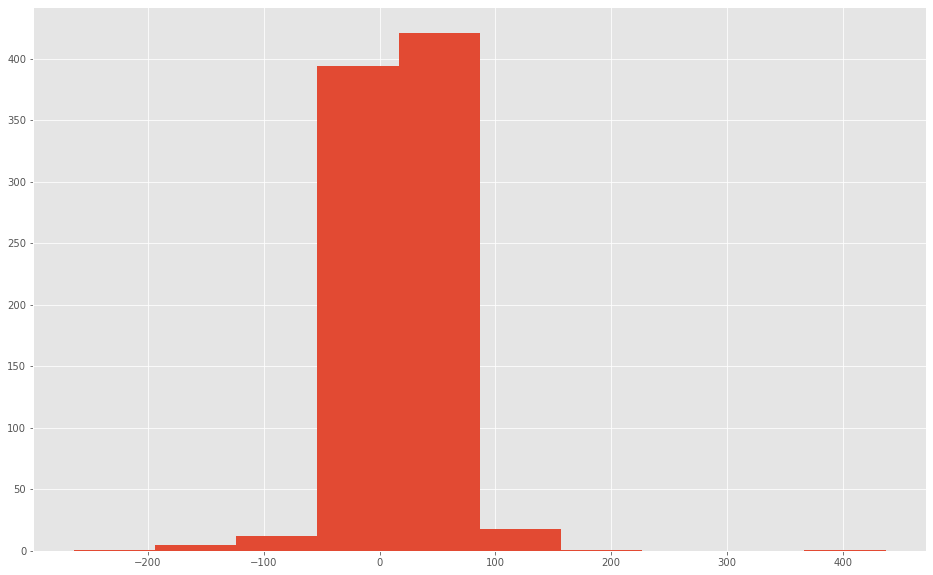

In [56]:
x = diff
plt.hist(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6a58a1b1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6a58a1b880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6a58a0de20>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6a58a1bf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6a58a252e0>],
 'means': []}

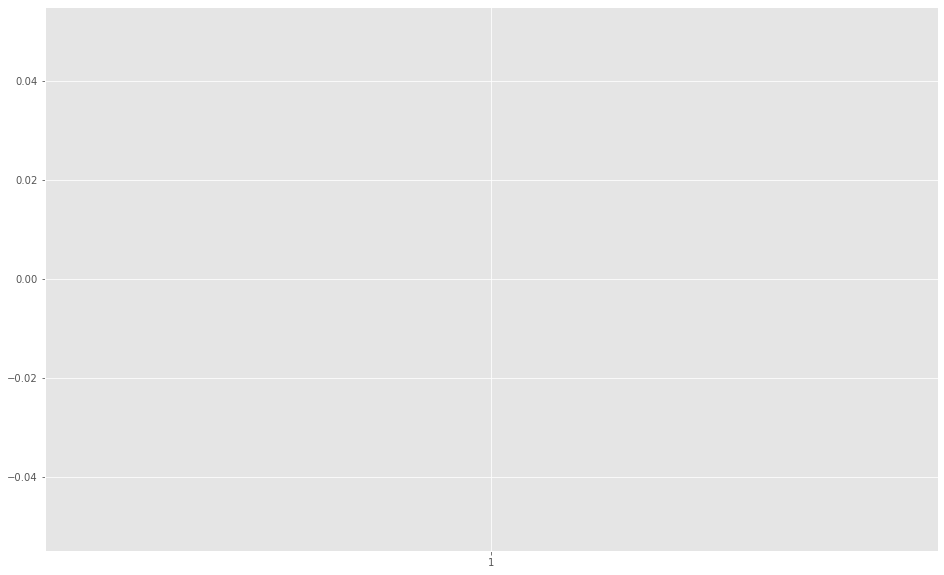

In [66]:
plt.boxplot(allcourses["points_r1_2021"])          

<AxesSubplot:>

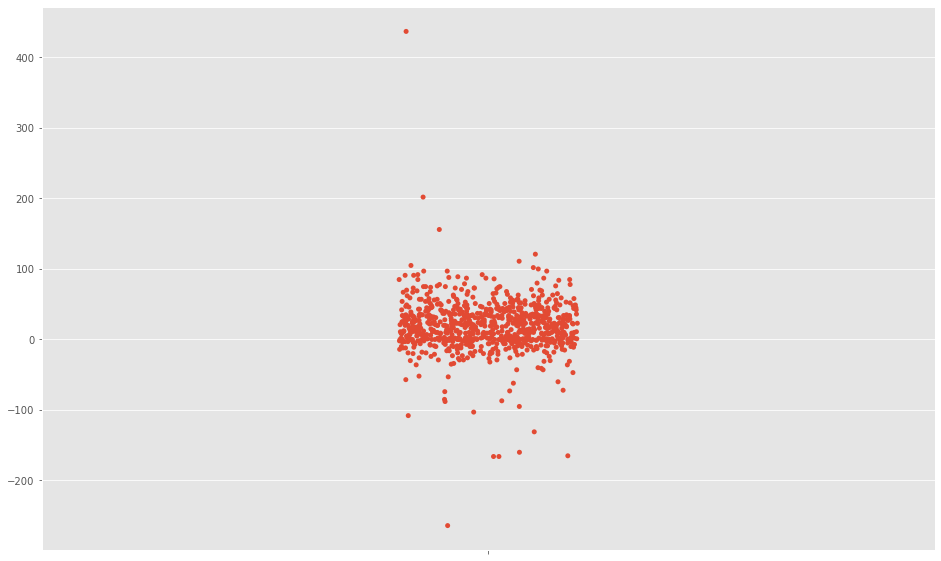

In [57]:
sns.stripplot (y = diff)

<AxesSubplot:xlabel='points_r1_2021'>

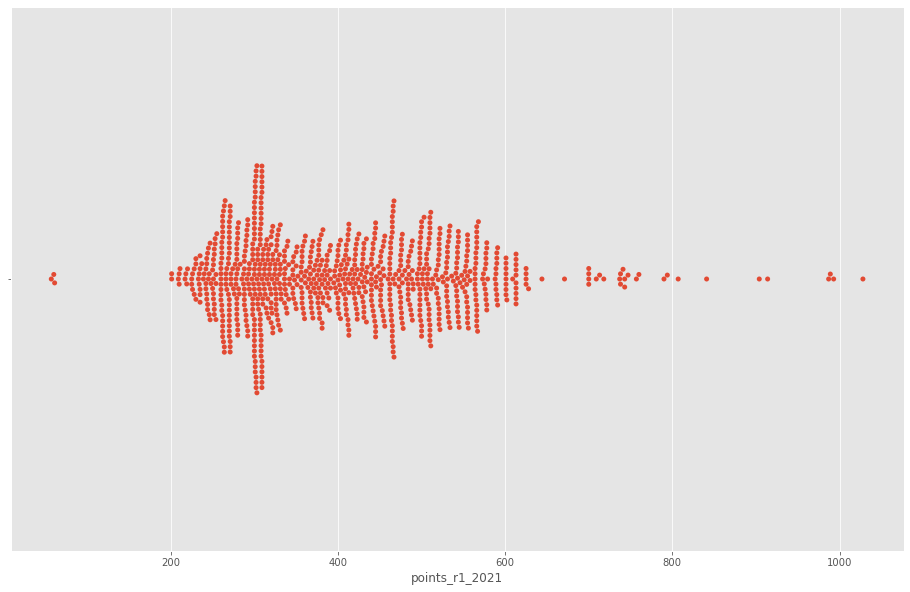

In [58]:
sns.swarmplot(x = allcourses["points_r1_2021"])

<AxesSubplot:ylabel='points_r1_2021'>

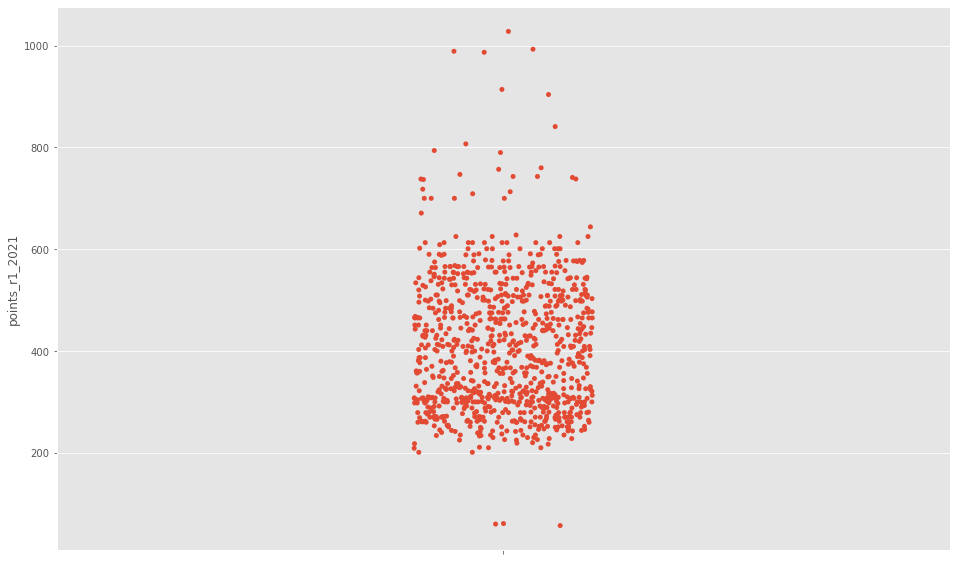

In [59]:
sns.stripplot (y = allcourses["points_r1_2021"])

<AxesSubplot:>

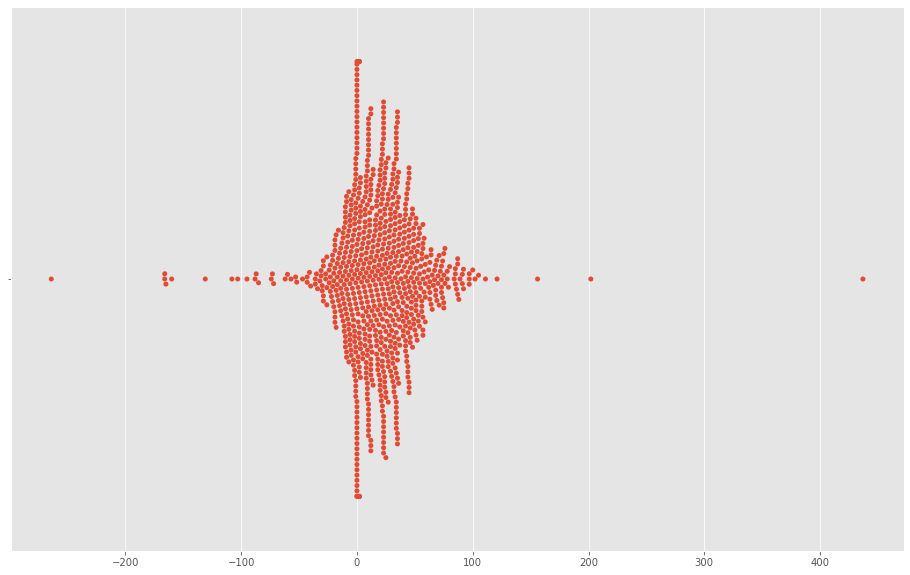

In [60]:
sns.swarmplot(x = diff )